In [49]:
# Импорт библиотек для работы с изображениями и визуализации
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

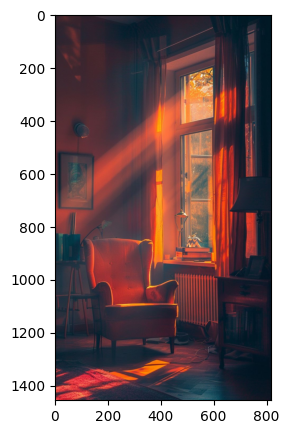

In [50]:
# Загружаем изображение и переводим из BGR в RGB для корректного отображения
img = cv2.imread("79e422b6f328eee0aa8a35fd7d34675c.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Показываем исходное изображение
plt.imshow(img)

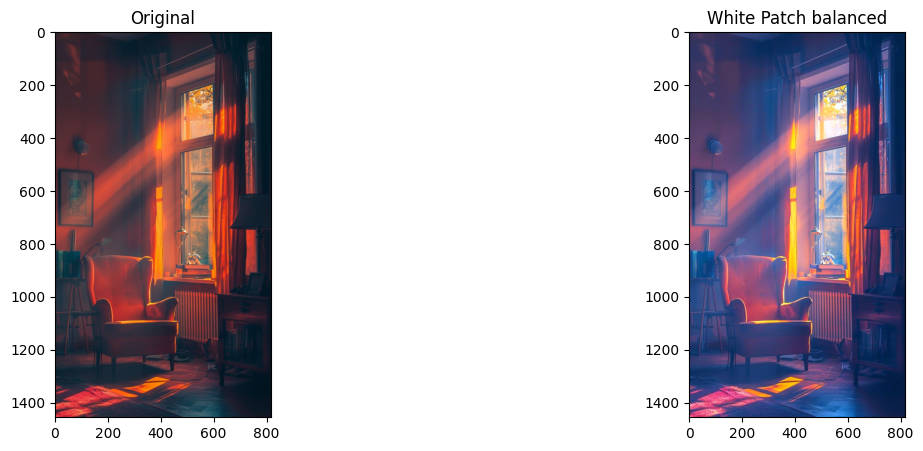

In [51]:
# WHITE PATCH: Белую точку берем как самый яркий пиксель
# Это позволяет вычислить коэффициенты усиления для каждого канала
img_f = img.astype(np.float32)
sum_rgb = img_f.sum(axis=2)

# берём верхние 1% ярких пикселей
th = np.percentile(sum_rgb, 99)
mask = sum_rgb >= th
white = img_f[mask].mean(axis=0)

coeffs = 255.0 / np.maximum(white, 1.0)

# Применяем коэффициенты к каждому каналу
balanced = np.zeros_like(img_f, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img_f[..., channel] * coeffs[channel]

# Ограничиваем значения и нормализуем для отображения
balanced = np.clip(balanced, 0.0, 255.0) / 255.0

# Показываем результат до и после
plt.subplot(121), plt.imshow(img / 255.0), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('White Patch balanced')
plt.show()


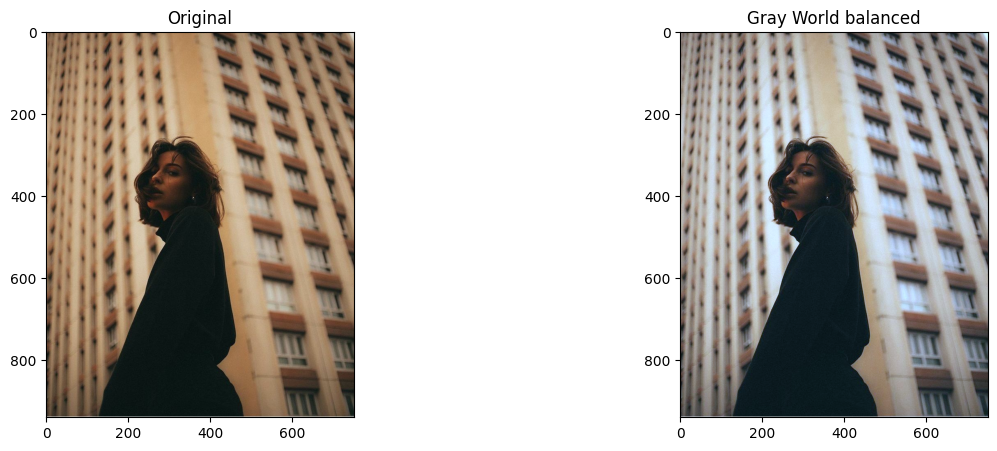

In [52]:
# GRAY WORLD: средние значения каналов приводим к одному уровню
# Загрузим изображение отдельно, чтобы блок был самодостаточным
img = cv2.imread("111.jpg")
if img is None:
    raise ValueError("Изображение не загружено. Проверь путь к файлу.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Переводим в float для вычислений
img_f = img.astype(np.float32)

# Считаем среднее по каждому каналу
mean_r = img_f[..., 0].mean()
mean_g = img_f[..., 1].mean()
mean_b = img_f[..., 2].mean()

# Фиксируем коэффициент самого яркого канала = 1, остальные выравниваем
means = np.array([mean_r, mean_g, mean_b], dtype=np.float32)
brightest_idx = np.argmax(means)
coeffs = np.ones(3, dtype=np.float32)
for i in range(3):
    if i != brightest_idx and means[i] != 0:
        coeffs[i] = means[brightest_idx] / means[i]

# Применяем балансировку
balanced_gw = img_f * coeffs
balanced_gw = np.clip(balanced_gw, 0.0, 255.0) / 255.0

# Показываем результат
plt.subplot(121), plt.imshow(img / 255.0), plt.title('Original')
plt.subplot(122), plt.imshow(balanced_gw), plt.title('Gray World balanced')
plt.show()


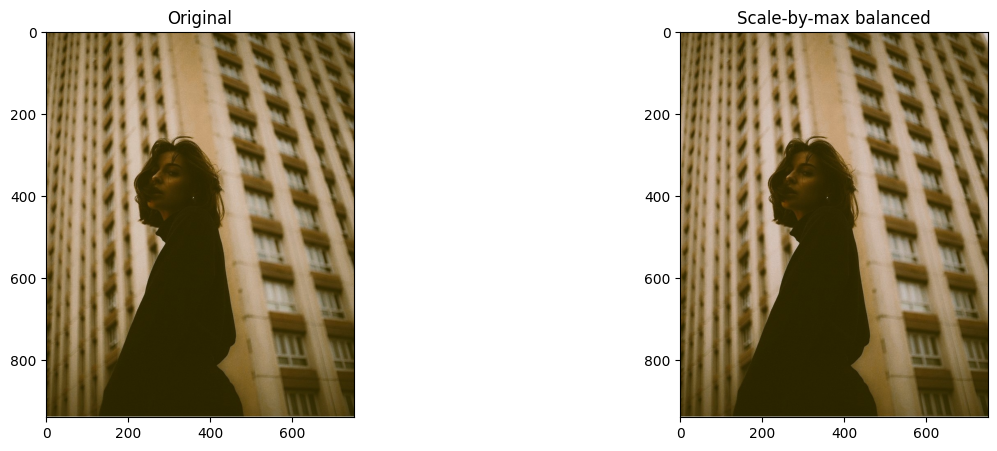

In [55]:
# SCALE-BY-MAX: каждый канал масштабируется по своему максимуму
# Загрузим изображение отдельно, чтобы блок был самодостаточным
img = cv2.imread("1112.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Переводим в float для вычислений
img_f = img.astype(np.float32)

# Находим максимум по каждому каналу
max_r = img_f[..., 0].max()
max_g = img_f[..., 1].max()
max_b = img_f[..., 2].max()

maxs = np.array([max_r, max_g, max_b], dtype=np.float32)
maxs[maxs == 0] = 1.0

# Коэффициенты масштаба: чтобы максимум каждого канала стал 255
coeffs = 255.0 / maxs

# Применяем балансировку
balanced = img_f * coeffs

# Ограничиваем значения и нормализуем для отображения
balanced = np.clip(balanced, 0.0, 255.0) / 255.0

# Показываем результат
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Scale-by-max balanced')
plt.show()